In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp


# First Order ODEs


Air friction while falling

${\frac{dv}{dt} - \alpha v^2 + \beta = 0 \space\space\space\space\space v(0) = 0}$

The first thing we need to do is write it in the form

$\frac{dv}{dt} = f(t, v)$

thus,

$\frac{dv}{dt} = \alpha v^2 - \beta$


In [2]:
def dvdt(t, v):
    return 3*v**2 - 5
v0 = 0

Solve differential equation. There are two main solvers in scipy
1) odeint: Pretty classic, uses a particular solve called Isoda from the FORTRAN library odepack
2) solve_ivp: More customizable, can choose from a list of possible solvers

In [3]:
t = np.linspace(0 ,1, 100)
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0, max(t)), y0=[v0], t_eval=t)

In [4]:
sol_m1.T[0] # velocity as a function of time

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

In [5]:
sol_m2.y[0]

array([ 0.        , -0.0504793 , -0.10080722, -0.15083038, -0.20039553,
       -0.24935878, -0.29758564, -0.34495103, -0.39133929, -0.43664418,
       -0.48076886, -0.52362591, -0.56513507, -0.60524282, -0.64391404,
       -0.68112062, -0.71684143, -0.75106235, -0.78377623, -0.81498294,
       -0.84468932, -0.87290923, -0.89966349, -0.92497994, -0.94889341,
       -0.97144571, -0.99268566, -1.01266906, -1.03145871, -1.04912441,
       -1.06573928, -1.08134937, -1.09599363, -1.10971235, -1.12254598,
       -1.13453506, -1.14572027, -1.15614242, -1.16584241, -1.17486131,
       -1.18324028, -1.19102062, -1.19824374, -1.20495119, -1.21118463,
       -1.21698585, -1.22239666, -1.22744653, -1.23215067, -1.23652537,
       -1.24058697, -1.24435186, -1.24783652, -1.25105747, -1.25403128,
       -1.25677462, -1.25930417, -1.2616367 , -1.26378904, -1.26577807,
       -1.26762074, -1.26933406, -1.27093508, -1.27243817, -1.27384571,
       -1.27515955, -1.27638204, -1.27751582, -1.27856386, -1.27

Plot

In [6]:
v_sol = sol_m2.y[0]

Text(0.5, 0, '$t$')

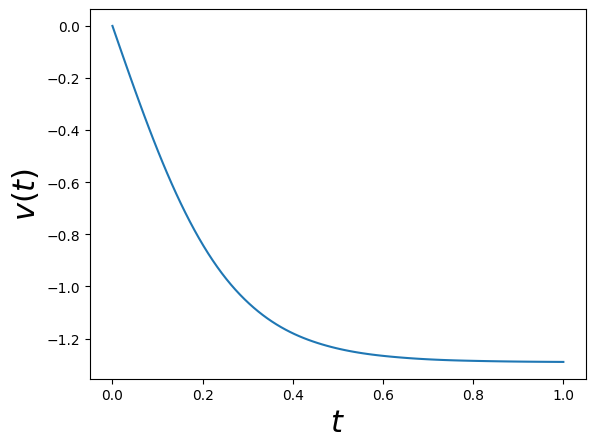

In [7]:
plt.plot(t, v_sol)
plt.ylabel('$v(t)$', fontsize=22)
plt.xlabel('$t$', fontsize=22)

# Coupled first order ODEs

$y'_1 = y_1 + y_2^2 + 3x \space\space\space\space\space\space\space y_1(0) = 0$

$y'_2 = 3y_1 + y^3_2 - cos(x) \space\space\space\space\space\space\space y_2(0) = 0$

Letting $S = (y_1, y_2)$ we need to write a function that return $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S = (y_1, y_2)$ and x. This is like before, but in vector format

$\vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \Rightarrow 
\frac{d\vec{S}}{dx} = \vec{f}(x, \vec{s})=\vec{f}(x, y_1, y_2) = \begin{bmatrix}y'_1\\y'_2\end{bmatrix}=\begin{bmatrix} y_1 + y_2^2 + 3x \\ 3y_1 + y^3_2 - cos(x)\end{bmatrix}$

In [8]:
def dSdx(x, S):
    y1, y2 = S
    return [y1+y2**2+3*x, 3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

Solving the ODE


In [9]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

Get y1 and y2 from the solution

In [10]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

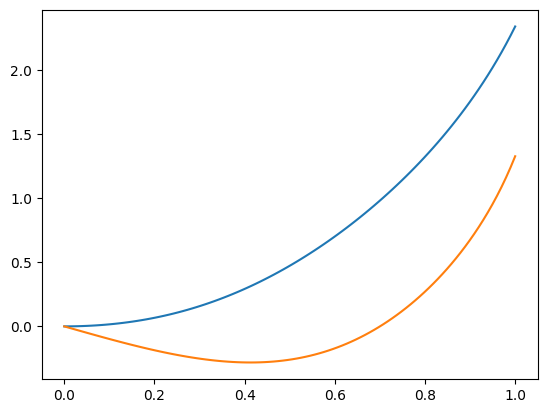

In [11]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

# Second Order ODEs
Python does not have function to directly solve scond order ODEs
But any second order ODE can be converted into two frist order ODE
consider

$\ddot{x} = -\dot{x}^2 + sin(x)$

can be converted to 

$\dot{x} = v \\
\dot{v} = -{v}^2 + sin(x)$

In [12]:
def dSdx(x, S):
    x, v = S
    return [v, -v**2 + np.sin(x)]

x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

In [13]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

In [14]:
x_sol = sol.T[0]
v_sol = sol.T[1]

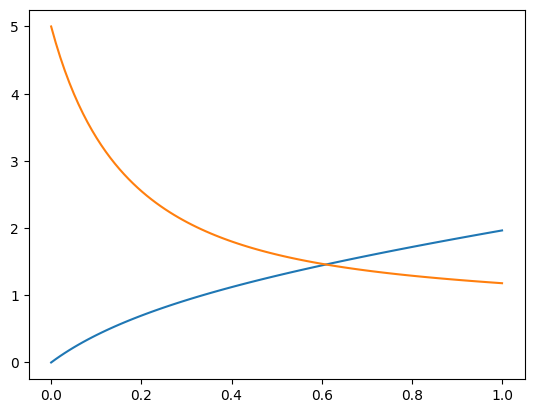

In [15]:
plt.plot(t, x_sol)
plt.plot(t, v_sol)